<a href="https://colab.research.google.com/github/Chris-Joy26/Chris-Infosys-Nov24/blob/main/WEEK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK 1
******
DATA COLLECTION

MOUNTING THE DRIVE TO ACCESS FILES FROM DRIVE TO GOOGLE COLLAB.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

READING THE PRODUCTA EXCEL FILE.

In [ ]:
producta=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA.xlsx')
print("THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:")
producta.head()

THE FIRST FIVE ROWS OF THE PRODUCTA DATASET ARE:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


READING THE PRODUCTA_FB_IMPRESSIONS EXCEL FILE.

In [ ]:
facebook_impressions=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_fb_impressions.xlsx')
print("THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:")
facebook_impressions.head()

THE FIRST FIVE ROWS OF THE FACEBOOK_IMPRESSION DATASET ARE:


,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


READING THE PRODUCTA_GOOGLE_CLICKS EXCEL FILE.

In [ ]:
google_clicks=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_google_clicks.xlsx')
print("THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;")
google_clicks.head()

THE FIRST FIVE ROWS OF THE GOOGLE_CLICKS DATASET ARE;


,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


MERGING THE THREE DATASETS TO GET THE REQUIRED MASTER DATASET.

In [ ]:
# merging using left outer join on 'Day Index'
mergeddata = pd.merge(producta,facebook_impressions , on="Day Index", how="left")
masterdata = pd.merge(mergeddata,google_clicks, on="Day Index", how="left")
print("THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;")
masterdata.head()

THE FIRST FIVE ROWS OF THE MASTER DATASET ARE;


,Day Index,Quantity,Impressions,Clicks
0,2021-12-01,14,620,445
1,2021-12-02,10,890,433
2,2021-12-03,13,851,424
3,2021-12-04,22,881,427
4,2021-12-05,33,678,451


WHOLE MASTER DATASET IS:

In [ ]:
print(masterdata)

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


CONVERTING THE DATAFRAME TO EXCEL FORMAT AND SAVING IN GOOGLE DRIVE.

In [ ]:
file_path = '/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx'
masterdata.to_excel(file_path, index=False)
print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx


WEEK 2
******
EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING.

DESCRIPTIVE STATISTICS
**********************

In [4]:
masterdata=pd.read_excel(r'/content/drive/My Drive/infosys internship/Datasets/ProductA_masterdata.xlsx')

In [5]:
masterdata.shape

(212, 4)

In [ ]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Impressions  212 non-null    int64         
 3   Clicks       212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


In [ ]:
masterdata.describe()

,Day Index,Quantity,Impressions,Clicks
count,212,212.000000,212.000000,212.00000
mean,2022-03-16 12:00:00,17.542453,1531.702830,358.20283
min,2021-12-01 00:00:00,5.000000,620.000000,60.00000
25%,2022-01-22 18:00:00,13.750000,1209.750000,154.00000
50%,2022-03-16 12:00:00,17.000000,1460.000000,402.50000
75%,2022-05-08 06:00:00,21.000000,1862.000000,492.75000
max,2022-06-30 00:00:00,38.000000,2707.000000,726.00000
std,NaN,5.790423,440.660783,164.52160


In [ ]:
print(masterdata.columns)

Index(['Day Index', 'Quantity', 'Impressions', 'Clicks'], dtype='object')


CONVERTING 'Day Index' COLUMN INTO DATETIME FORMAT TO ENSURE TIMESERIES FORMAT

In [6]:
masterdata['Day Index'] = pd.to_datetime(masterdata['Day Index'])

SETTING 'Day Index' COLUMN AS THE INDEX OF THE MASTER DATASET

In [7]:
masterdata.set_index('Day Index', inplace=True)

DISPLAYING THE FORMAT OF MASTERDATA DATAFRAME

In [ ]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2021-12-01 to 2022-06-30
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Quantity     212 non-null    int64
 1   Impressions  212 non-null    int64
 2   Clicks       212 non-null    int64
dtypes: int64(3)
memory usage: 6.6 KB


DISPLAYING THE FIRST 5 ROWS OF THE DATAFRAME AFTER SETTING 'Day Index' AS INDEX.

In [ ]:
masterdata.head()

,Quantity,Impressions,Clicks
Day Index,,,
2021-12-01,14,620,445
2021-12-02,10,890,433
2021-12-03,13,851,424
2021-12-04,22,881,427
2021-12-05,33,678,451


LISTING COLUMNS AFTER SETTING 'Day Index' AS INDEX OF MASTERDATA DATAFRAME.

In [ ]:
print(masterdata.columns)

Index(['Quantity', 'Impressions', 'Clicks'], dtype='object')


PRIMARY VISUALISATION

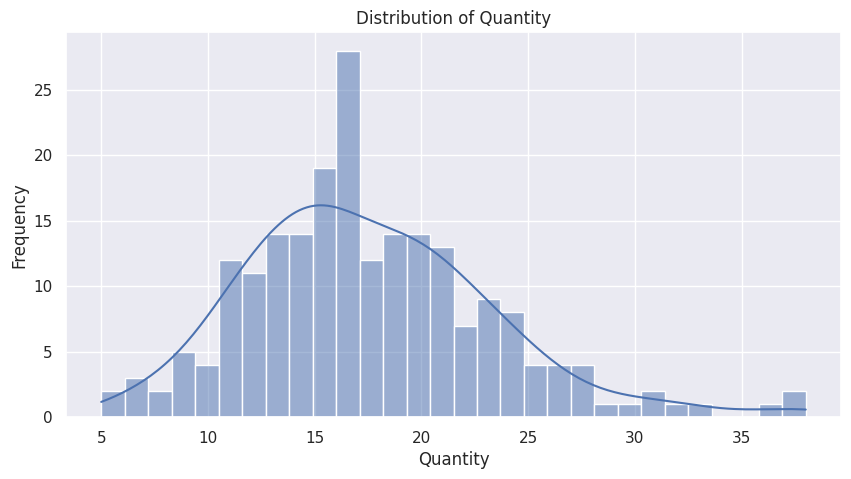

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

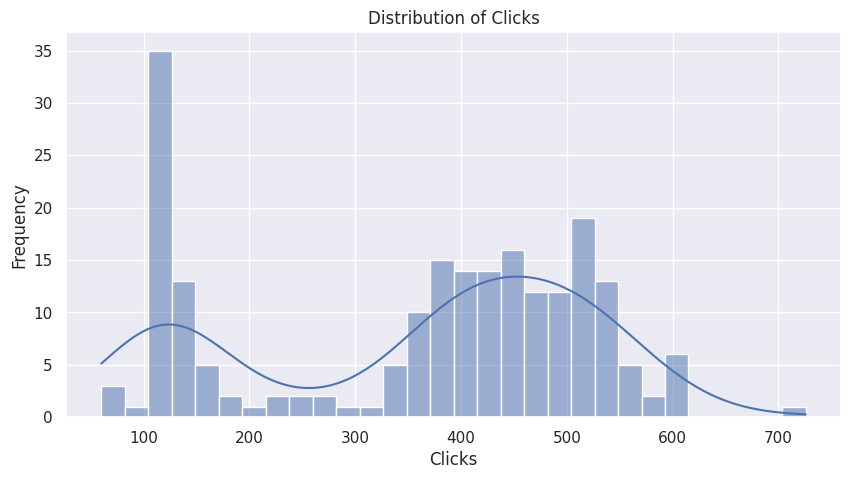

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Clicks'], kde=True, bins=30)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

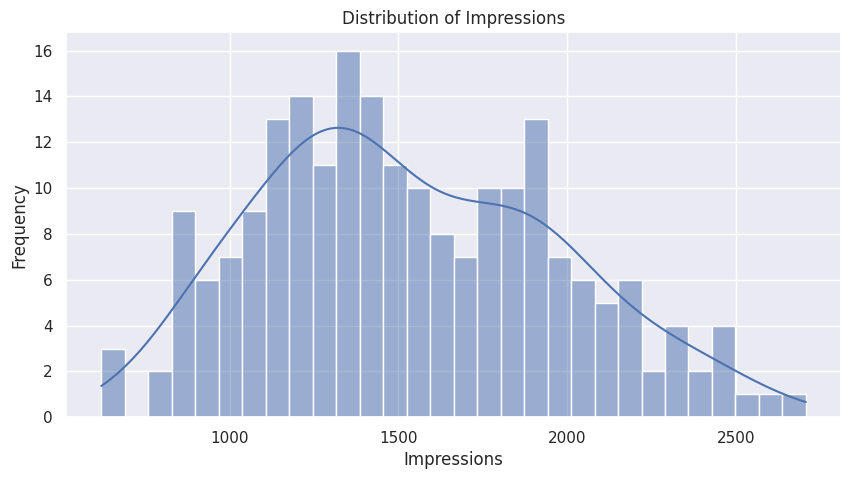

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(masterdata['Impressions'], kde=True, bins=30)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

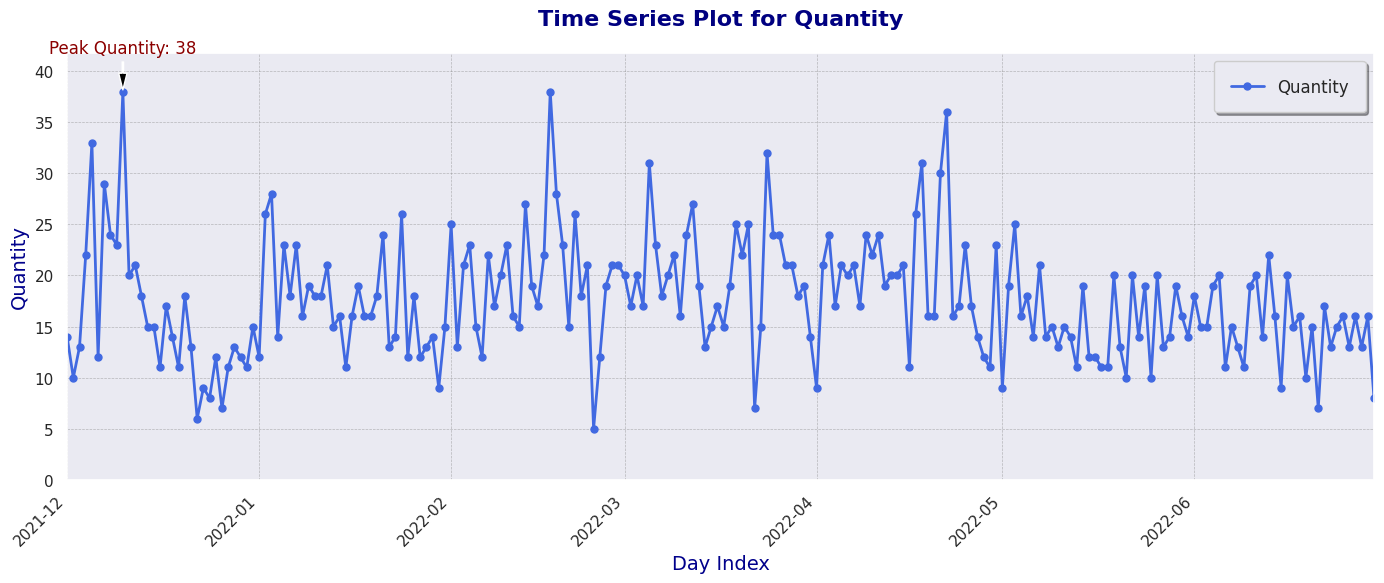

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Quantity'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Quantity')

plt.title('Time Series Plot for Quantity', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Quantity', fontsize=14, color='darkblue')

plt.legend(loc='upper right', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Quantity'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Quantity'].idxmax()  # Day of max Impressions
peak_value = masterdata['Quantity'].max()  # Max Impressions value
plt.annotate(f'Peak Quantity: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

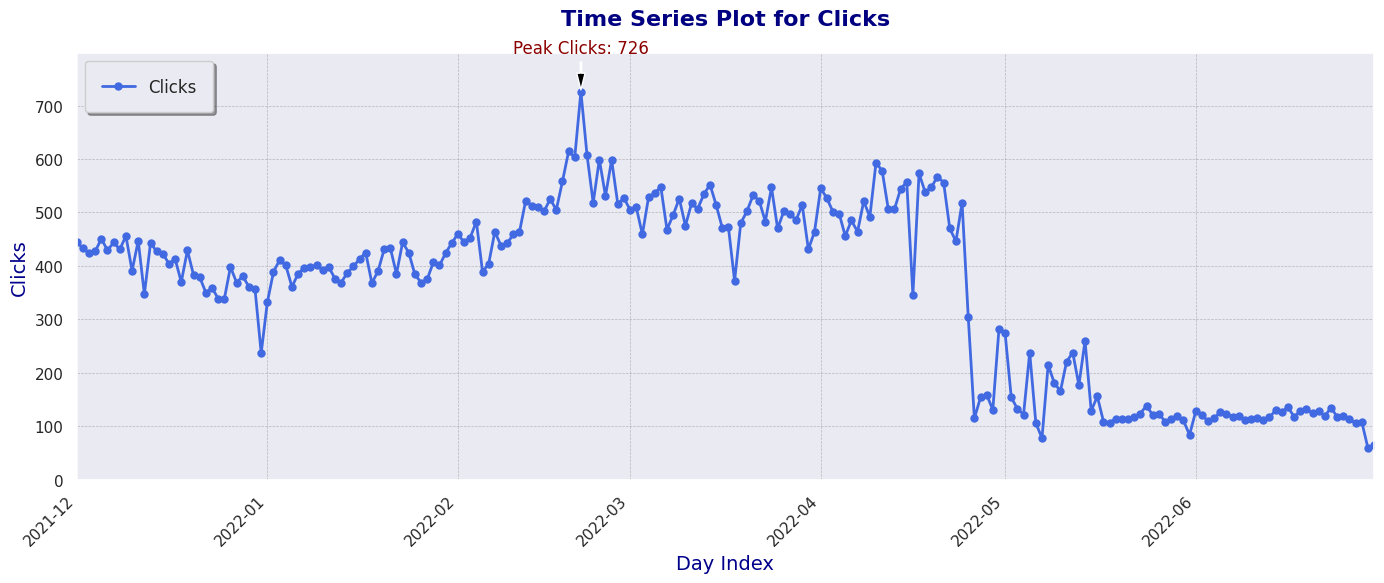

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Clicks'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Clicks')

plt.title('Time Series Plot for Clicks', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Clicks', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Clicks'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Clicks'].idxmax()  # Day of max Impressions
peak_value = masterdata['Clicks'].max()  # Max Impressions value
plt.annotate(f'Peak Clicks: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

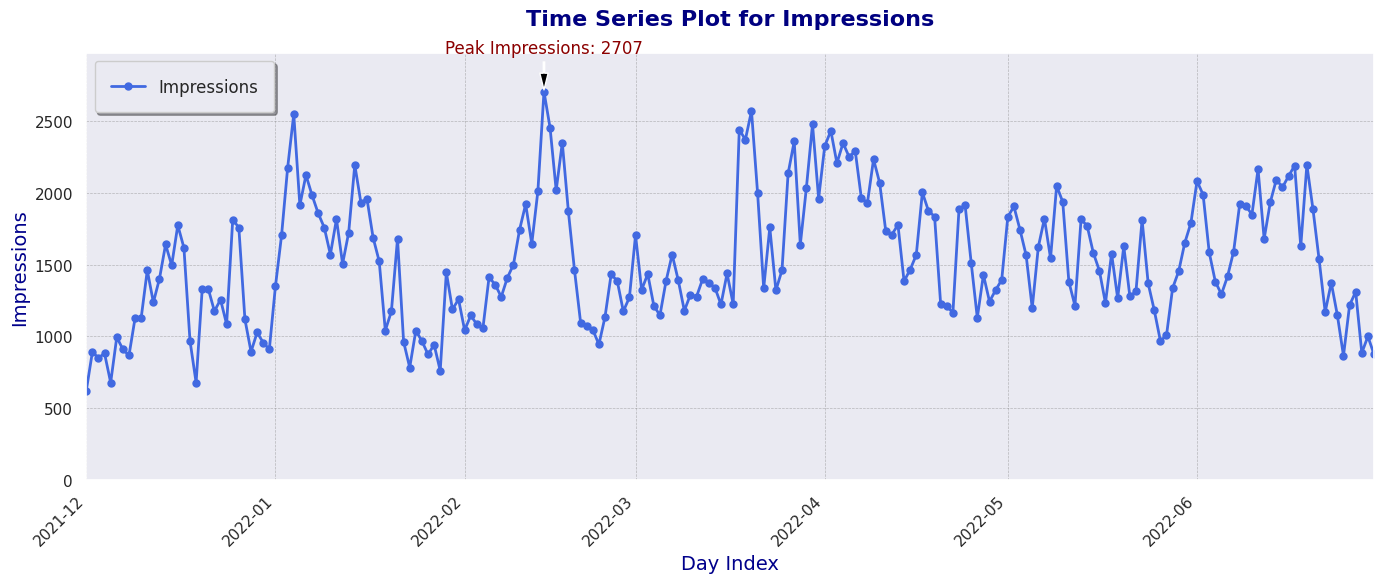

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(masterdata.index, masterdata['Impressions'], color='royalblue', linewidth=2, marker='o', markersize=5, label='Impressions')

plt.title('Time Series Plot for Impressions', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Index', fontsize=14, color='darkblue')
plt.ylabel('Impressions', fontsize=14, color='darkblue')

plt.legend(loc='upper left', fontsize=12, shadow=True, borderpad=1)

plt.xlim(masterdata.index.min(), masterdata.index.max())
plt.ylim(0, masterdata['Impressions'].max() * 1.1)  # Leave 10% space above the highest value

plt.xticks(rotation=45, ha='right')

plt.grid( which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

#annotation to highlight a peak data point
peak_day = masterdata['Impressions'].idxmax()  # Day of max Impressions
peak_value = masterdata['Impressions'].max()  # Max Impressions value
plt.annotate(f'Peak Impressions: {peak_value}',
             xy=(peak_day, peak_value),
             xytext=(peak_day, peak_value * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
             fontsize=12, color='darkred', ha='center')

plt.tight_layout()
plt.show()

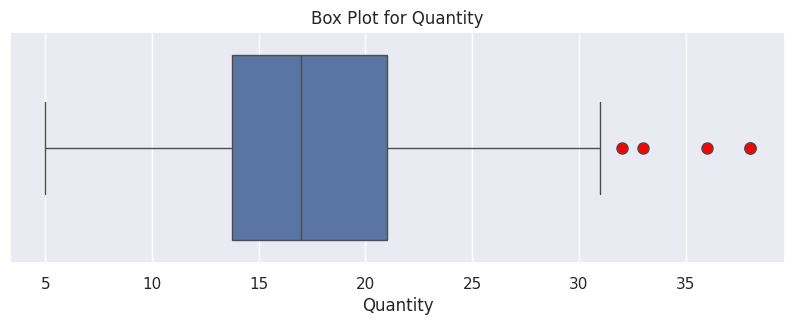

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Quantity'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Quantity')
plt.xlabel('Quantity')
plt.show()

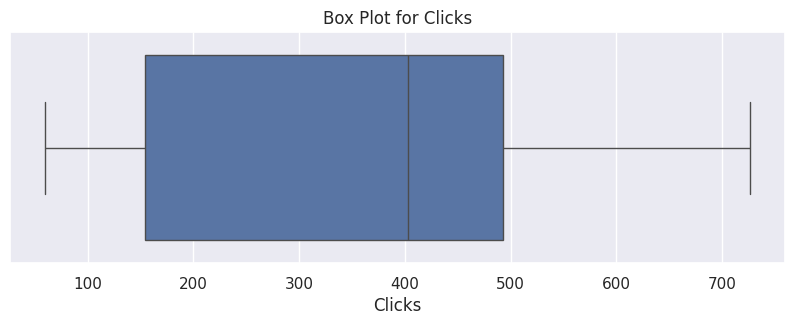

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Clicks'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Clicks')
plt.xlabel('Clicks')
plt.show()

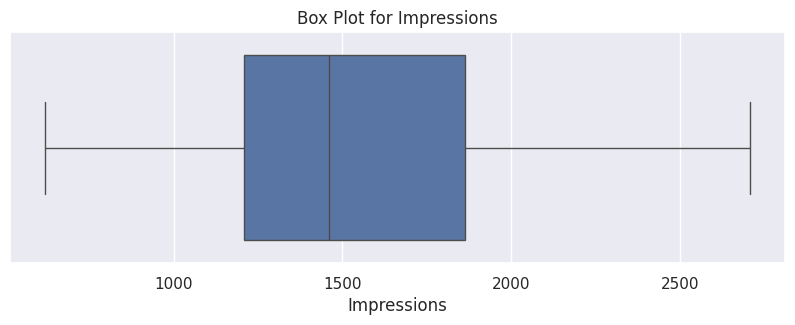

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=masterdata['Impressions'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Box Plot for Impressions')
plt.xlabel('Impressions')
plt.show()

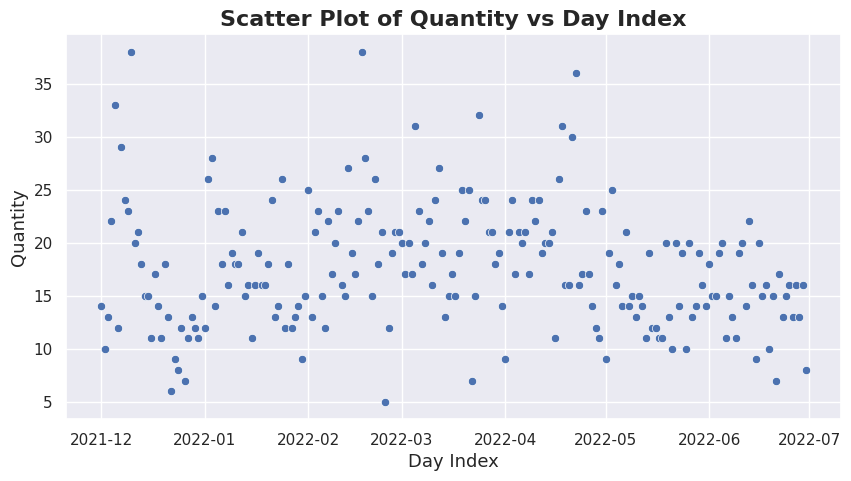

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Quantity')
plt.title('Scatter Plot of Quantity vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

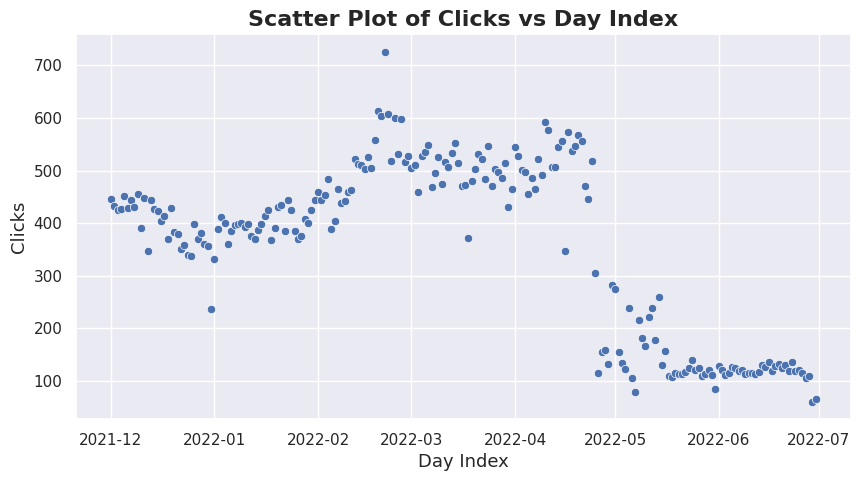

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Clicks')
plt.title('Scatter Plot of Clicks vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Clicks', fontsize=13)
plt.show()

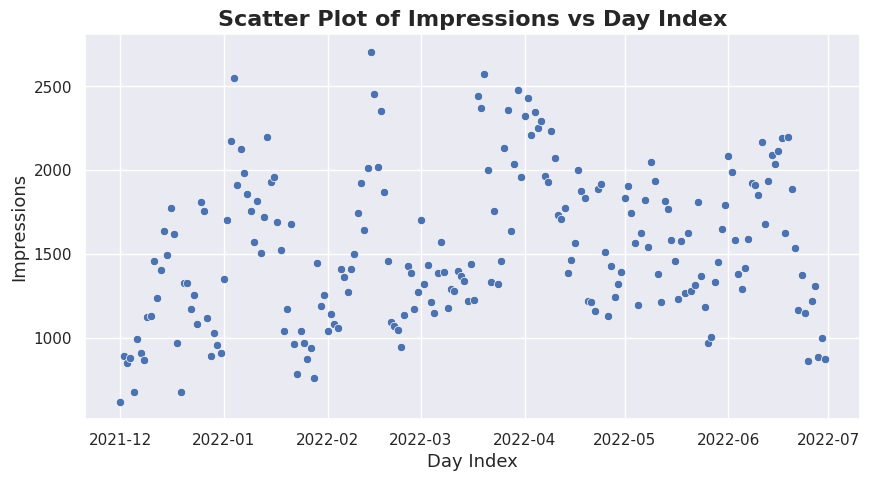

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=masterdata, x=masterdata.index, y='Impressions')
plt.title('Scatter Plot of Impressions vs Day Index', fontsize=16, fontweight='bold')
plt.xlabel('Day Index', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

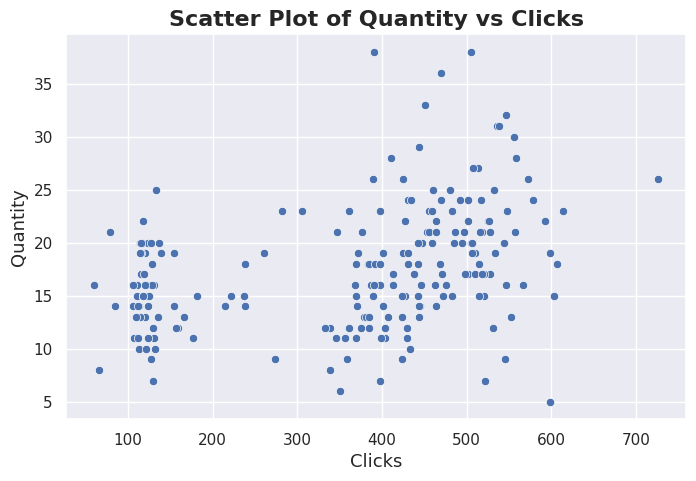

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Quantity')
plt.title('Scatter Plot of Quantity vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

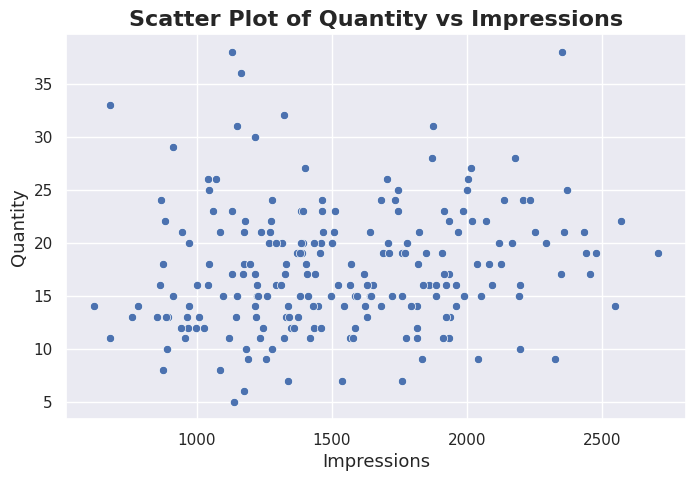

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Impressions', y='Quantity')
plt.title('Scatter Plot of Quantity vs Impressions', fontsize=16, fontweight='bold')
plt.xlabel('Impressions', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.show()

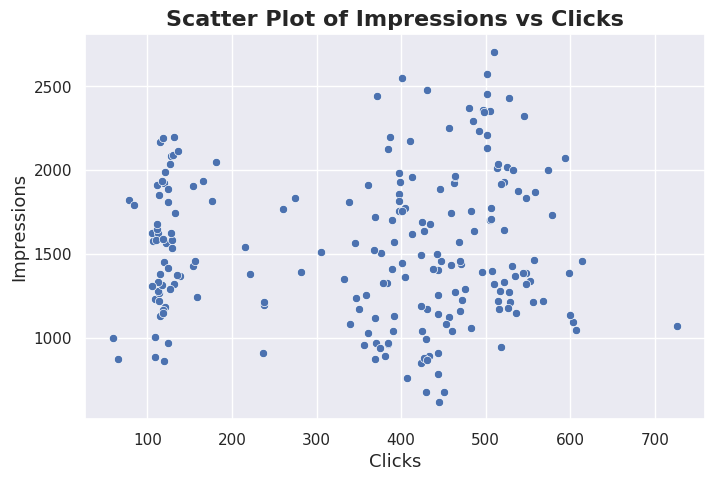

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masterdata, x='Clicks', y='Impressions')
plt.title('Scatter Plot of Impressions vs Clicks', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=13)
plt.ylabel('Impressions', fontsize=13)
plt.show()

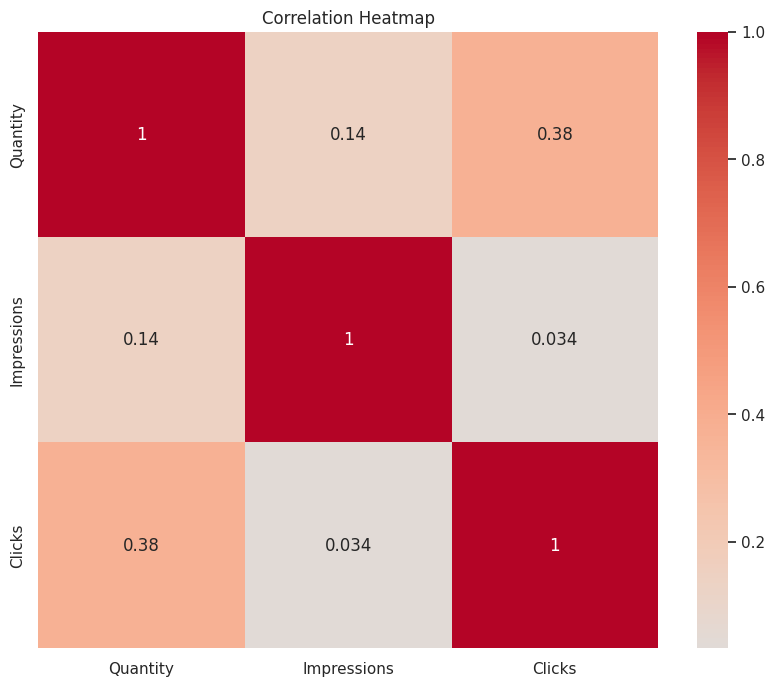

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = masterdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

MISSING VALUES-IMPUTATION

In [8]:
print("MISSING VALUES:")
missingrows_count=masterdata.isnull().sum()
print(missingrows_count)

MISSING VALUES:
Quantity       0
Impressions    0
Clicks         0
dtype: int64


NO IMPUTATION REQUIRED AS THERE ARE NO MISSING VALUES

DROPING DUPLICATES

In [9]:
masterdata.drop_duplicates()

,Quantity,Impressions,Clicks
Day Index,,,
2021-12-01,14,620,445
2021-12-02,10,890,433
2021-12-03,13,851,424
2021-12-04,22,881,427
2021-12-05,33,678,451
...,...,...,...
2022-06-26,13,1218,114
2022-06-27,16,1311,106
2022-06-28,13,885,109


NO DUPLICATES FOUND AS NO ROWS WERE DROPPED AFTER USING drop_duplicates().

In [10]:
print(masterdata)

            Quantity  Impressions  Clicks
Day Index                                
2021-12-01        14          620     445
2021-12-02        10          890     433
2021-12-03        13          851     424
2021-12-04        22          881     427
2021-12-05        33          678     451
...              ...          ...     ...
2022-06-26        13         1218     114
2022-06-27        16         1311     106
2022-06-28        13          885     109
2022-06-29        16         1000      60
2022-06-30         8          875      65

[212 rows x 3 columns]


DETECTING OUTLIERS

In [11]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])

THE OUTLIERS OF QUANTITY COLUMN ARE:
[33, 38, 38, 32, 36]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]


REPLACING OUTLIERS WITH 97TH PERCENTILE

In [12]:
percentile97=masterdata['Quantity'].quantile(0.97)
print(percentile97)

30.669999999999987


In [13]:

  q1=masterdata['Quantity'].quantile(0.25)
  q3=masterdata['Quantity'].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  masterdata['Imputed_Quantity'] = np.where(masterdata['Quantity'] > upper_bound,
                                  percentile97,
                                  masterdata['Quantity'])

In [14]:
print(masterdata.columns)

Index(['Quantity', 'Impressions', 'Clicks', 'Imputed_Quantity'], dtype='object')


In [15]:
outliers={}
for column in masterdata.columns:
  q1=masterdata[column].quantile(0.25)
  q3=masterdata[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers[column]=[]
  for value in masterdata[column]:
    if value<lower_bound or value>upper_bound:
        outliers[column].append(value)
print("THE OUTLIERS OF OLD QUANTITY COLUMN ARE:")
print(outliers['Quantity'])
print("THE OUTLIERS OF NEW IMPUTED QUANTITY COLUMN ARE:")
print(outliers['Imputed_Quantity'])
print("THE OUTLIERS OF IMPRESSIONS COLUMN ARE:")
print(outliers['Impressions'])
print("THE OUTLIERS OF CLICKS COLUMN ARE:")
print(outliers['Clicks'])

THE OUTLIERS OF OLD QUANTITY COLUMN ARE:
[33, 38, 38, 32, 36]
THE OUTLIERS OF NEW IMPUTED QUANTITY COLUMN ARE:
[]
THE OUTLIERS OF IMPRESSIONS COLUMN ARE:
[]
THE OUTLIERS OF CLICKS COLUMN ARE:
[]


FEATURE ENGINEERING

In [16]:
masterdata.head(n=10)

,Quantity,Impressions,Clicks,Imputed_Quantity
Day Index,,,,
2021-12-01,14,620,445,14.00
2021-12-02,10,890,433,10.00
2021-12-03,13,851,424,13.00
2021-12-04,22,881,427,22.00
2021-12-05,33,678,451,30.67
2021-12-06,12,995,429,12.00
2021-12-07,29,910,444,29.00
2021-12-08,24,867,431,24.00
2021-12-09,23,1128,456,23.00


LOG TRANSFORMED ATTRIBUTES

In [17]:
masterdata['Log_quantity'] = np.log1p(masterdata['Quantity'])
masterdata['Log_clicks'] = np.log1p(masterdata['Clicks'])
masterdata['Log_impressions'] = np.log1p(masterdata['Impressions'])

EXTRACT MONTH AND YEAR

In [18]:
masterdata['YearMonth'] = masterdata.index.to_period('M')
masterdata[['YearMonth']].head(n=40)

,YearMonth
Day Index,
2021-12-01,2021-12
2021-12-02,2021-12
2021-12-03,2021-12
2021-12-04,2021-12
2021-12-05,2021-12
2021-12-06,2021-12
2021-12-07,2021-12
2021-12-08,2021-12
2021-12-09,2021-12


EXTRACT MONTH NAME

In [19]:
masterdata['Monthname'] = masterdata.index.month_name()
masterdata[['Monthname']].head(n=40)

,Monthname
Day Index,
2021-12-01,December
2021-12-02,December
2021-12-03,December
2021-12-04,December
2021-12-05,December
2021-12-06,December
2021-12-07,December
2021-12-08,December
2021-12-09,December


In [20]:
summary_Monthname = masterdata.groupby('Monthname')[['Quantity','Impressions', 'Clicks']].mean()
summary_Monthname

,Quantity,Impressions,Clicks
Monthname,,,
April,19.966667,1761.900000,449.333333
December,15.967742,1157.645161,396.258065
February,19.785714,1501.500000,513.285714
January,17.193548,1531.096774,397.225806
June,14.900000,1611.433333,116.800000
March,20.000000,1638.806452,497.387097
May,15.193548,1526.612903,147.290323


EXTRACT DAY OF WEEK

In [21]:
masterdata['Dayofweek'] = masterdata.index.day_name()
masterdata[['Dayofweek']].head()

,Dayofweek
Day Index,
2021-12-01,Wednesday
2021-12-02,Thursday
2021-12-03,Friday
2021-12-04,Saturday
2021-12-05,Sunday


In [22]:
summary_Dayofweek = masterdata.groupby('Dayofweek')[['Quantity','Impressions', 'Clicks']].mean()
summary_Dayofweek

,Quantity,Impressions,Clicks
Dayofweek,,,
Friday,17.966667,1531.900000,351.333333
Monday,18.833333,1612.100000,370.066667
Saturday,18.100000,1580.233333,359.300000
Sunday,17.866667,1580.000000,377.933333
Thursday,17.193548,1427.096774,355.064516
Tuesday,16.433333,1546.366667,349.333333
Wednesday,16.451613,1450.419355,344.935484


EXTRACT WEEK OF MONTH

In [23]:
def week_of_month(date):
    first_day = date.replace(day=1)
    return (date.day + first_day.weekday()) // 7+1 #+1 TO ENSURE WEEK IS NOT 0
masterdata['Weekofmonth'] = masterdata.index.to_series().apply(week_of_month)#DAY_INDEX IS CONVERTED INTO ANDAS SERIES FOR HANDLINH
masterdata[['Weekofmonth']].head(n=65)

,Weekofmonth
Day Index,
2021-12-01,1
2021-12-02,1
2021-12-03,1
2021-12-04,1
2021-12-05,2
...,...
2022-01-30,6
2022-01-31,6
2022-02-01,1


In [24]:
summary_Weekofmonth = masterdata.groupby('Weekofmonth')[['Quantity','Impressions', 'Clicks']].mean()
summary_Weekofmonth

,Quantity,Impressions,Clicks
Weekofmonth,,,
1,17.619048,1379.190476,398.761905
2,19.938776,1651.367347,364.693878
3,17.877551,1756.122449,380.142857
4,16.673469,1445.102041,379.163265
5,15.538462,1298.333333,289.923077
6,14.600000,1469.200000,236.400000


EXTRACTING DAYOFWEEK_NUMERIC AND MONTH_NUMERIC

In [25]:
def daytonumber(day):
    days = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
    return days[day]
masterdata['Dayofweek_numeric'] = masterdata['Dayofweek'].apply(daytonumber)
def monthtonumber(month):
    months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November':11,'December':12}
    return months[month]
masterdata['Month_numeric'] = masterdata['Monthname'].apply(monthtonumber)

In [26]:
masterdata.head(n=40)

,Quantity,Impressions,Clicks,Imputed_Quantity,Log_quantity,Log_clicks,Log_impressions,YearMonth,Monthname,Dayofweek,Weekofmonth,Dayofweek_numeric,Month_numeric
Day Index,,,,,,,,,,,,,
2021-12-01,14,620,445,14.00,2.708050,6.100319,6.431331,2021-12,December,Wednesday,1,3,12
2021-12-02,10,890,433,10.00,2.397895,6.073045,6.792344,2021-12,December,Thursday,1,4,12
2021-12-03,13,851,424,13.00,2.639057,6.052089,6.747587,2021-12,December,Friday,1,5,12
2021-12-04,22,881,427,22.00,3.135494,6.059123,6.782192,2021-12,December,Saturday,1,6,12
2021-12-05,33,678,451,30.67,3.526361,6.113682,6.520621,2021-12,December,Sunday,2,7,12
2021-12-06,12,995,429,12.00,2.564949,6.063785,6.903747,2021-12,December,Monday,2,1,12
2021-12-07,29,910,444,29.00,3.401197,6.098074,6.814543,2021-12,December,Tuesday,2,2,12
2021-12-08,24,867,431,24.00,3.218876,6.068426,6.766192,2021-12,December,Wednesday,2,3,12
2021-12-09,23,1128,456,23.00,3.178054,6.124683,7.029088,2021-12,December,Thursday,2,4,12


MAPPING WEEKDAYS AND MONTHS INTO SEPARATE COLUMNS

In [27]:
masterdata.loc[masterdata['Dayofweek'] == 'Monday','Weekday_Monday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Tuesday','Weekday_Tuesday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Wednesday','Weekday_Wednesday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Thursday','Weekday_Thursday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Friday','Weekday_Friday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Saturday','Weekday_Saturday'] = 1
masterdata.loc[masterdata['Dayofweek'] == 'Sunday','Weekday_Sunday'] = 1

masterdata.loc[masterdata['Monthname'] == 'January','Month_January'] = 1
masterdata.loc[masterdata['Monthname'] == 'February','Month_February'] = 1
masterdata.loc[masterdata['Monthname'] == 'March','Month_March'] = 1
masterdata.loc[masterdata['Monthname'] == 'April','Month_April'] = 1
masterdata.loc[masterdata['Monthname'] == 'May','Month_May'] = 1
masterdata.loc[masterdata['Monthname'] == 'June','Month_June'] = 1
masterdata.loc[masterdata['Monthname'] == 'July','Month_July'] = 1
masterdata.loc[masterdata['Monthname'] == 'August','Month_August'] = 1
masterdata.loc[masterdata['Monthname'] == 'September','Month_September'] = 1
masterdata.loc[masterdata['Monthname'] == 'October','Month_October'] = 1
masterdata.loc[masterdata['Monthname'] == 'November','Month_November'] = 1
masterdata.loc[masterdata['Monthname'] == 'December','Month_December'] = 1


In [28]:
masterdata.head(n=40)

,Quantity,Impressions,Clicks,Imputed_Quantity,Log_quantity,Log_clicks,Log_impressions,YearMonth,Monthname,Dayofweek,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
Day Index,,,,,,,,,,,,,,,,,,,,,
2021-12-01,14,620,445,14.00,2.708050,6.100319,6.431331,2021-12,December,Wednesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-02,10,890,433,10.00,2.397895,6.073045,6.792344,2021-12,December,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-03,13,851,424,13.00,2.639057,6.052089,6.747587,2021-12,December,Friday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-04,22,881,427,22.00,3.135494,6.059123,6.782192,2021-12,December,Saturday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-05,33,678,451,30.67,3.526361,6.113682,6.520621,2021-12,December,Sunday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-06,12,995,429,12.00,2.564949,6.063785,6.903747,2021-12,December,Monday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-07,29,910,444,29.00,3.401197,6.098074,6.814543,2021-12,December,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-08,24,867,431,24.00,3.218876,6.068426,6.766192,2021-12,December,Wednesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2021-12-09,23,1128,456,23.00,3.178054,6.124683,7.029088,2021-12,December,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


REPLACING NaN VALUES WITH ZERO

In [29]:
weekdayscol = ['Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday']

monthscol = ['Month_January', 'Month_February', 'Month_March', 'Month_April', 'Month_May', 'Month_June', 'Month_July', 'Month_August', 'Month_September',
             'Month_October', 'Month_November', 'Month_December']

masterdata[weekdayscol] = masterdata[weekdayscol].fillna(0)
masterdata[monthscol] = masterdata[monthscol].fillna(0)

FINAL DATA

In [30]:
masterdata.columns

Index(['Quantity', 'Impressions', 'Clicks', 'Imputed_Quantity', 'Log_quantity',
       'Log_clicks', 'Log_impressions', 'YearMonth', 'Monthname', 'Dayofweek',
       'Weekofmonth', 'Dayofweek_numeric', 'Month_numeric', 'Weekday_Monday',
       'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
       'Weekday_Friday', 'Weekday_Saturday', 'Weekday_Sunday', 'Month_January',
       'Month_February', 'Month_March', 'Month_April', 'Month_May',
       'Month_June', 'Month_July', 'Month_August', 'Month_September',
       'Month_October', 'Month_November', 'Month_December'],
      dtype='object')

In [31]:
masterdata.head(n=40)

,Quantity,Impressions,Clicks,Imputed_Quantity,Log_quantity,Log_clicks,Log_impressions,YearMonth,Monthname,Dayofweek,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
Day Index,,,,,,,,,,,,,,,,,,,,,
2021-12-01,14,620,445,14.00,2.708050,6.100319,6.431331,2021-12,December,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-02,10,890,433,10.00,2.397895,6.073045,6.792344,2021-12,December,Thursday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-03,13,851,424,13.00,2.639057,6.052089,6.747587,2021-12,December,Friday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-04,22,881,427,22.00,3.135494,6.059123,6.782192,2021-12,December,Saturday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-05,33,678,451,30.67,3.526361,6.113682,6.520621,2021-12,December,Sunday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-06,12,995,429,12.00,2.564949,6.063785,6.903747,2021-12,December,Monday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-07,29,910,444,29.00,3.401197,6.098074,6.814543,2021-12,December,Tuesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-08,24,867,431,24.00,3.218876,6.068426,6.766192,2021-12,December,Wednesday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-12-09,23,1128,456,23.00,3.178054,6.124683,7.029088,2021-12,December,Thursday,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
masterdata.dtypes


,0
Quantity,int64
Impressions,int64
Clicks,int64
Imputed_Quantity,float64
Log_quantity,float64
Log_clicks,float64
Log_impressions,float64
YearMonth,period[M]
Monthname,object
Dayofweek,object


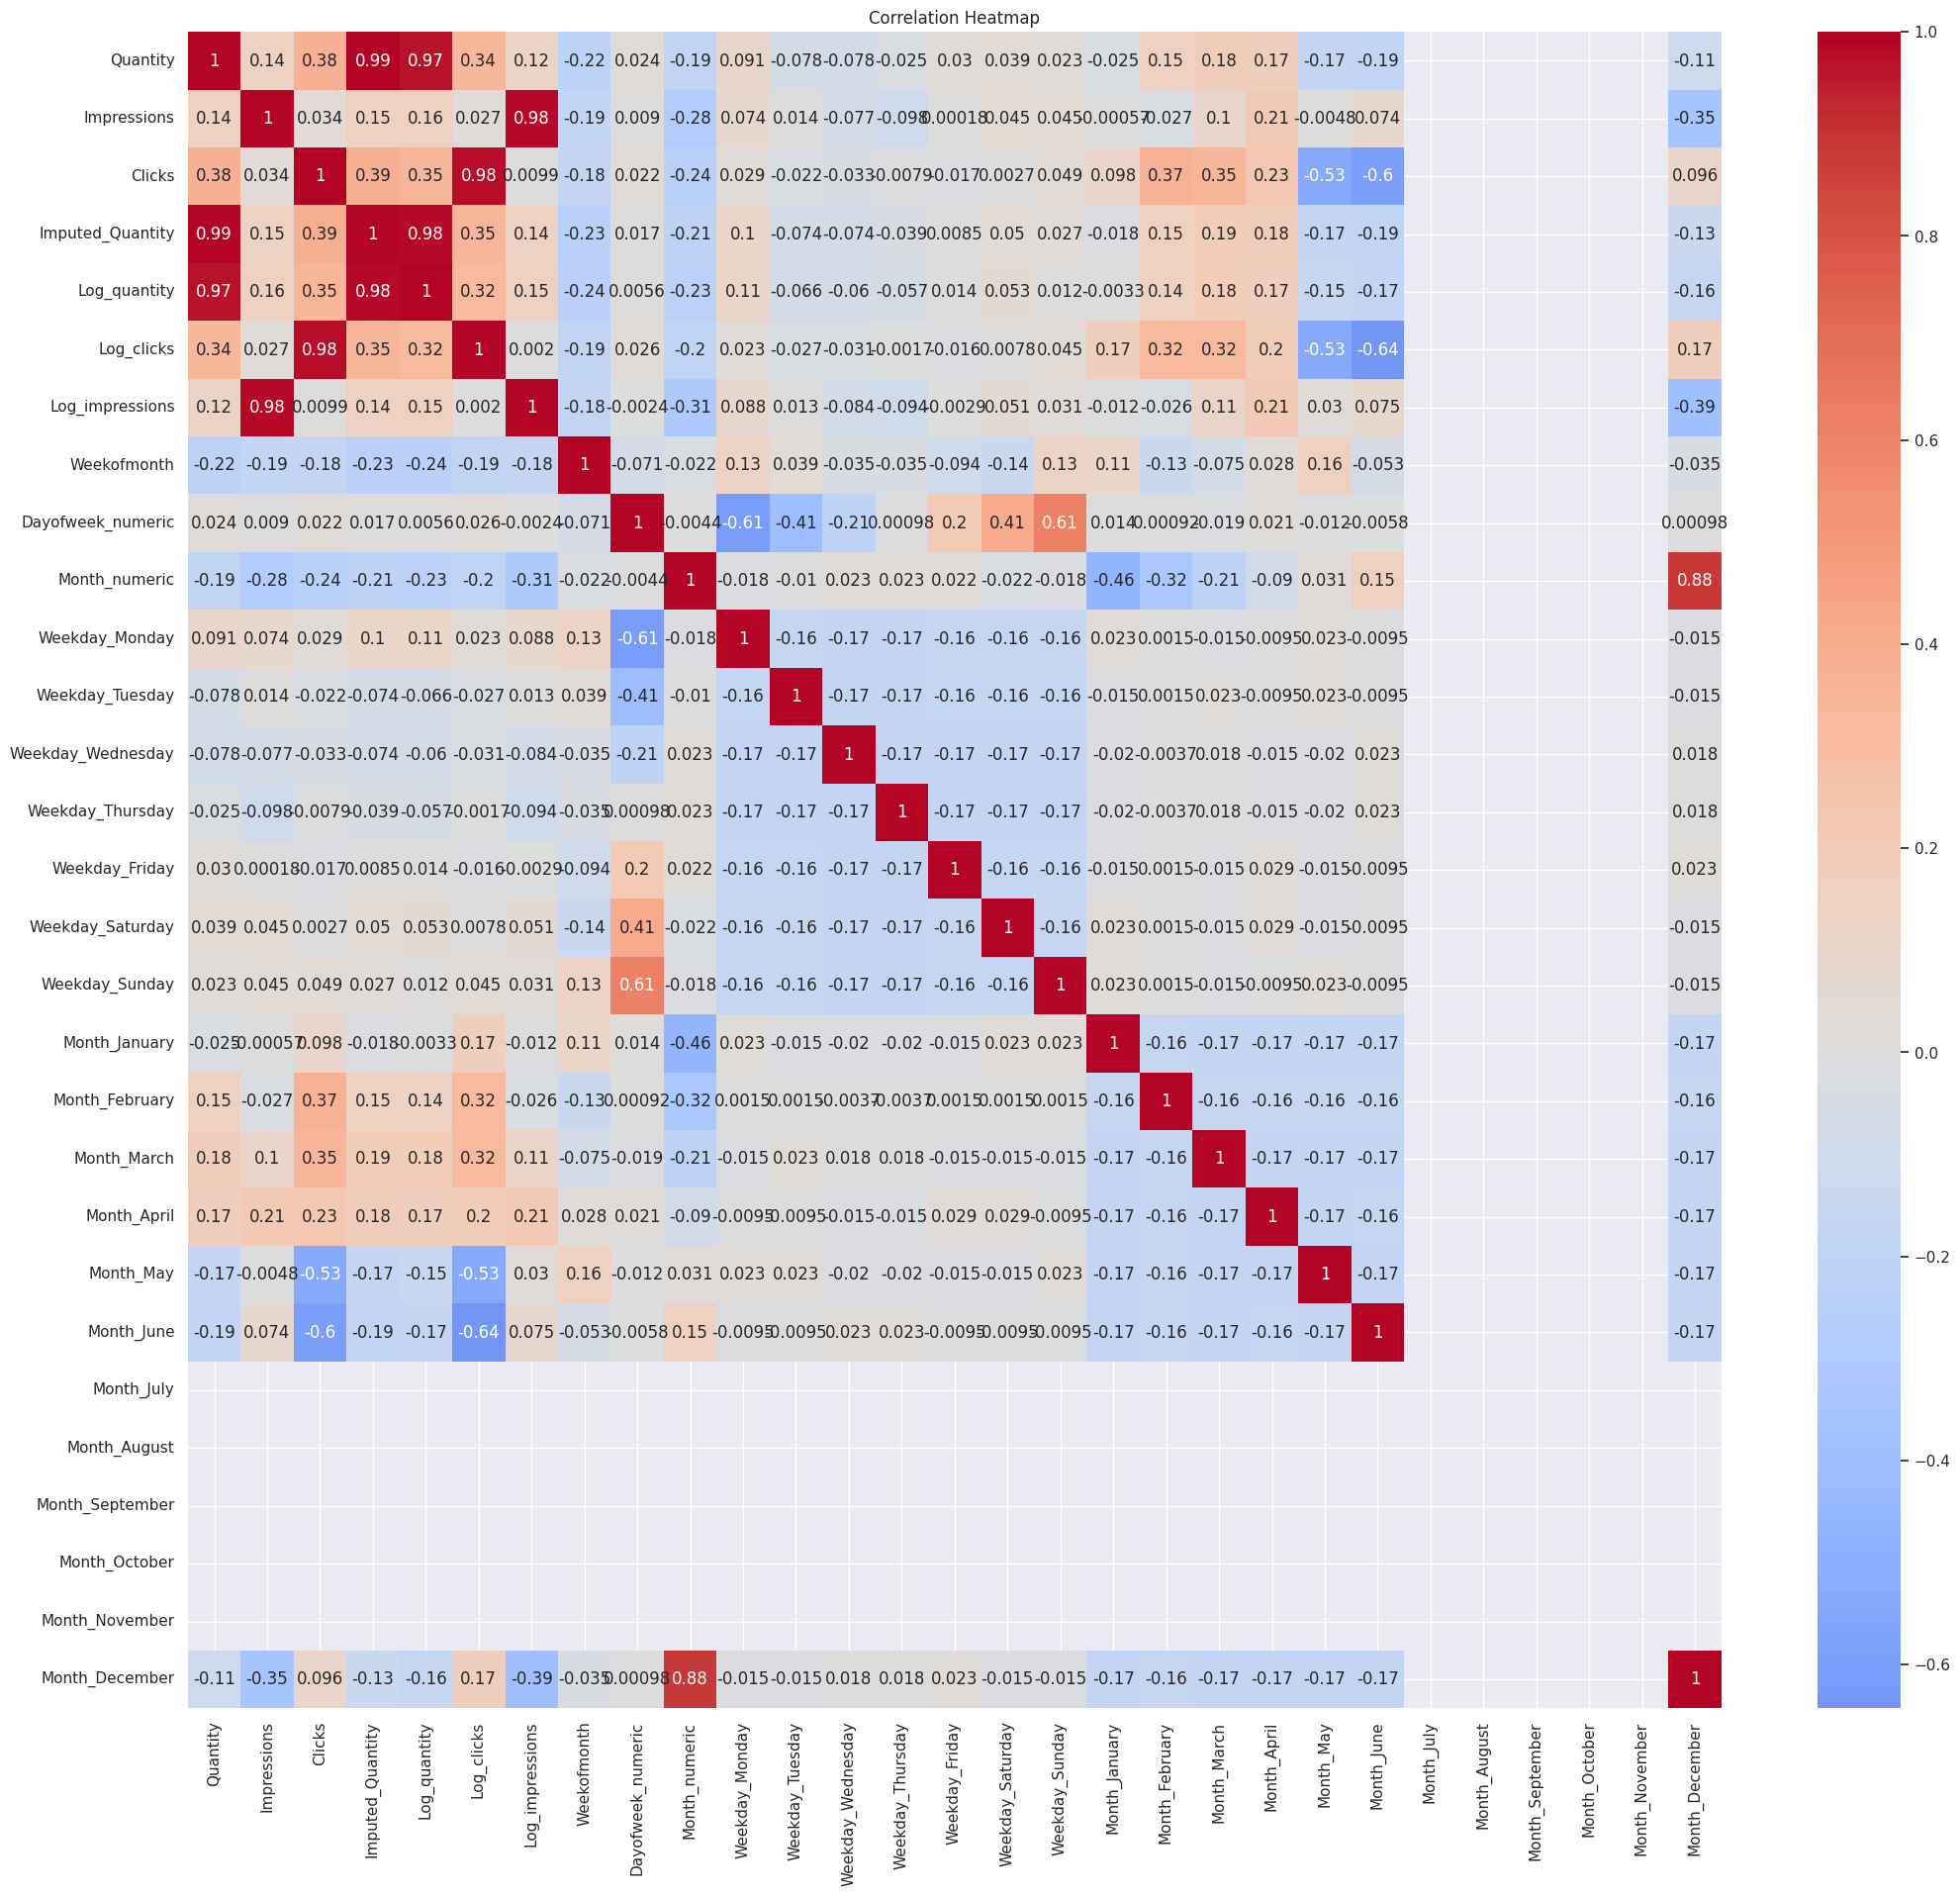

In [ ]:
plt.figure(figsize=(25, 22))
correlation_matrix = masterdata.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

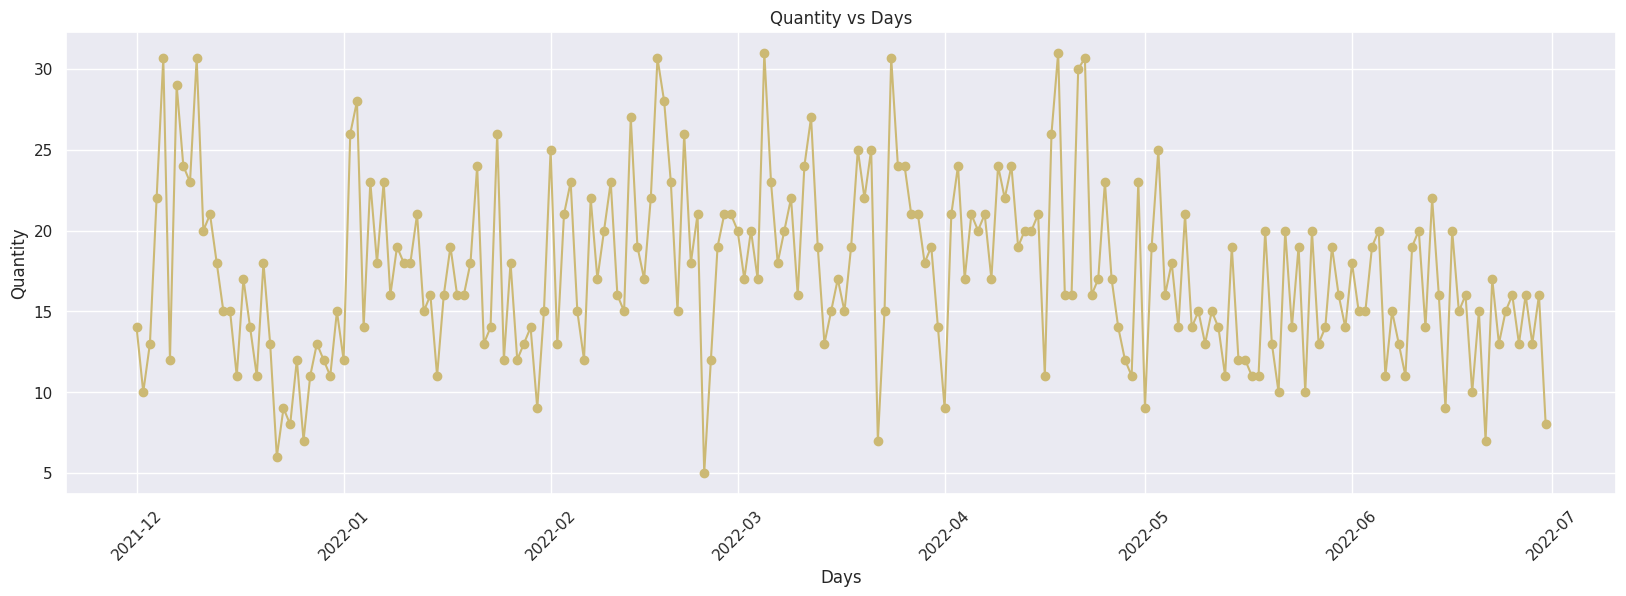

In [40]:
plt.figure(figsize=(20, 6))
plt.plot(masterdata.index, masterdata['Imputed_Quantity'], marker='o', linestyle='-', color='y')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Quantity vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


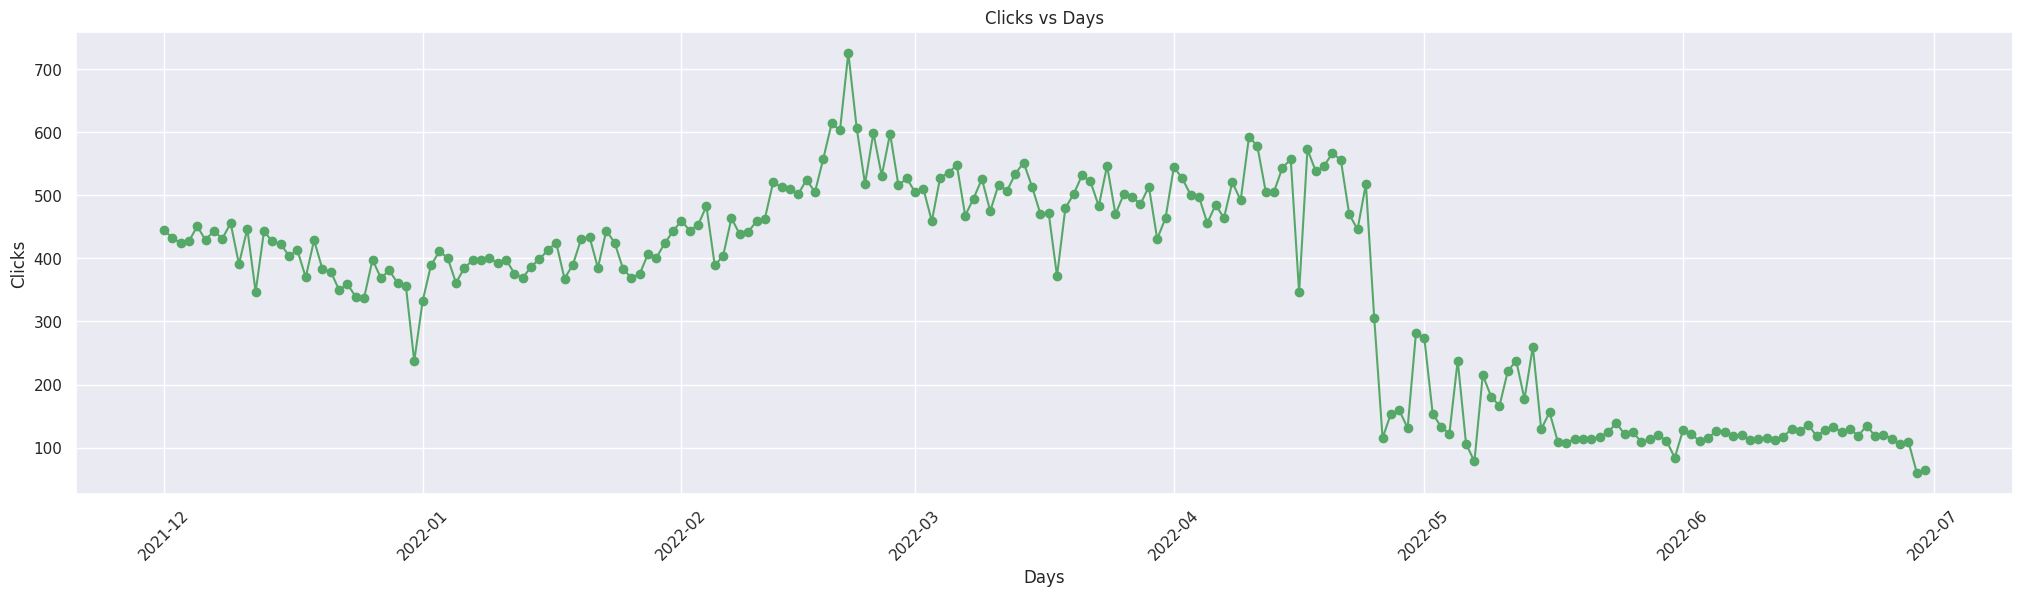

In [44]:
plt.figure(figsize=(25, 6))
plt.plot(masterdata.index, masterdata['Clicks'], marker='o', linestyle='-', color='g')
plt.xlabel('Days')
plt.ylabel('Clicks')
plt.title('Clicks vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


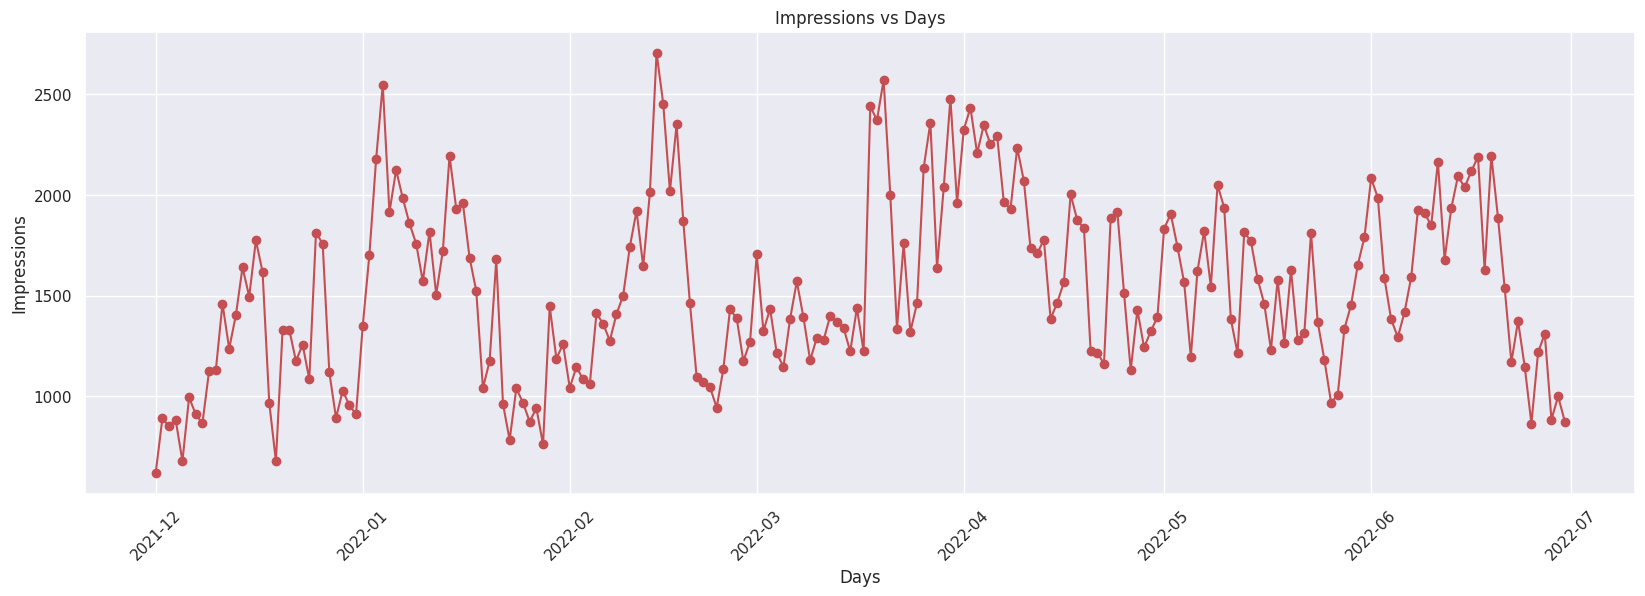

In [46]:
plt.figure(figsize=(20, 6))
plt.plot(masterdata.index, masterdata['Impressions'], marker='o', linestyle='-', color='r')
plt.xlabel('Days')
plt.ylabel('Impressions')
plt.title('Impressions vs Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-73-fdd8a2ee0782>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x_col)[y_col].sum().reset_index()
<ipython-input-73-fdd8a2ee0782>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x_col)[y_col].sum().reset_index()
<ipython-input-73-fdd8a2ee0782>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x_col)[y_col].sum().reset_index()


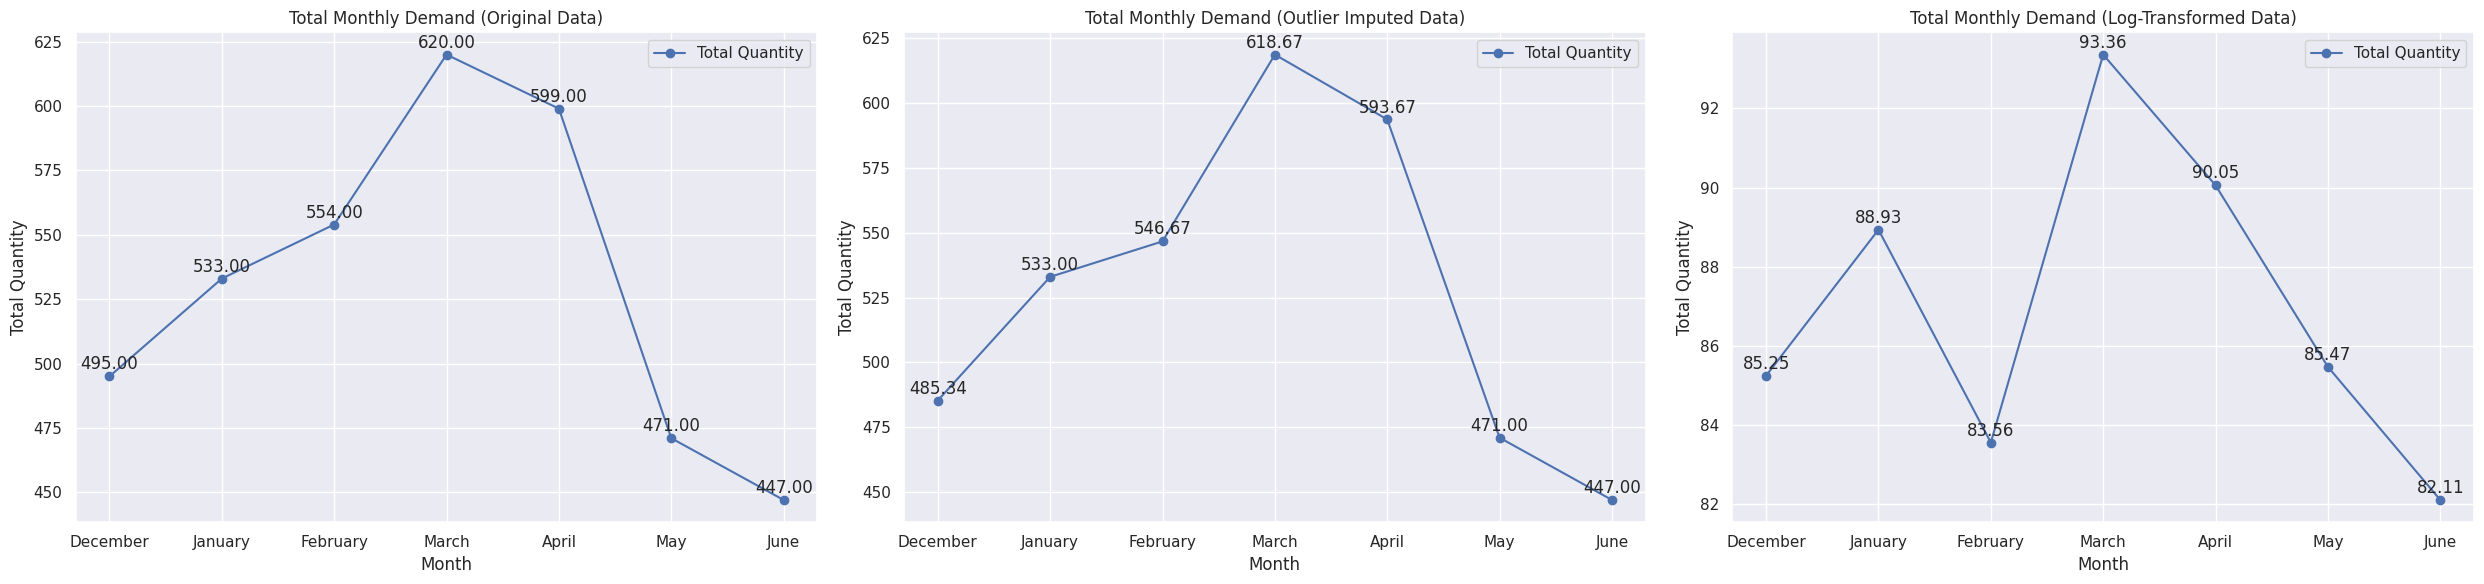

In [73]:
def annotate_points(ax, x, y, labels):
    for i, label in enumerate(labels):
        ax.annotate(f'{label:.2f}',  # Format to 2 decimal places
                    (x.iloc[i], y.iloc[i]),  # The position of the annotation
                    textcoords="offset points",  # Offsets the text to avoid overlap with points
                    xytext=(0, 5),  # Moves the annotation 5 points above the point
                    ha='center')  # Horizontally center the annotation text

# Define the function to plot the monthly demand
def plot_monthly_demand(df, x_col, y_col, title, ax):
    # Group by x_col (e.g., 'Monthname') and sum the y_col values (e.g., 'Quantity')
    df1 = df.groupby(x_col)[y_col].sum().reset_index()

    # Ensure the months are plotted only for those that exist in the dataset
    df1 = df1[df1[x_col].isin(df[x_col].unique())]

    # Sort by the order of the months as they appear in the data (retain order)
    df1 = df1.set_index(x_col).reindex(df1[x_col].unique()).reset_index()

    # Plot the line for the given x_col (e.g., 'Monthname') vs y_col (e.g., 'Quantity')
    ax.plot(df1[x_col], df1[y_col], marker='o', color='b', label='Total Quantity')

    # Annotate points on the plot
    annotate_points(ax, df1[x_col], df1[y_col], df1[y_col])

    # Set the title of the plot
    ax.set_title(title)

    # Label the axes
    ax.set_xlabel('Month' if x_col == 'Monthname' else 'Week')
    ax.set_ylabel('Total Quantity')

    # Show grid and legend
    ax.grid(True)
    ax.legend()

# Main plotting function
def create_plots(masterdata):
    # Create subplots (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(25, 6))

    # Plot each graph for the respective data columns and titles
    plot_monthly_demand(masterdata, 'Monthname', 'Quantity', 'Total Monthly Demand (Original Data)', axes[0])
    plot_monthly_demand(masterdata, 'Monthname', 'Imputed_Quantity', 'Total Monthly Demand (Outlier Imputed Data)', axes[1])
    plot_monthly_demand(masterdata, 'Monthname', 'Log_quantity', 'Total Monthly Demand (Log-Transformed Data)', axes[2])

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage (Make sure 'masterdata' is defined and contains necessary columns)
# Assuming 'masterdata' contains columns: 'Monthname', 'Quantity', 'Imputed_Quantity', 'Log_quantity', and 'Weekofmonth'

# Now, call the plotting function
create_plots(masterdata)
